In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install tensorflow==2.4.0
# !pip install tf-nightly

     |████████████████████████████████| 394.7MB 42kB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [4]:
import os
os.chdir('gdrive/MyDrive/project/')
# os.chdir('gdrive/MyDrive/EEM119/project/')
!ls

 backup_demo.ipynb     hail_sogmoid
 beryldata	       hail_sogmoid.tflite
 classifier_v0	      'm119 final demo.gslides'
 concatenated0.pkl    'M119 Winter 2021 Project Proposal.gdoc'
 datacollect.ipynb     model.png
 data_collect_v3.ino   nihilism
 data_read_v3.py       nihilism.tflite
 dropout	       nihilist
 dropout.tflite        nihilist.tflite
 eight.png	       nine.png
 fake_news	       one.png
 fake_news.tflite      seven.png
 five.png	       six.png
 fixed_model	       three.png
 fixed_model.tflite    training.ipynb
 flatten	       two.png
 flatten.tflite        zero.png
 four.png


In [5]:
import numpy as np
import pickle

In [ ]:
x_list = []
y_list = []
for filename in os.listdir("beryldata"):
  if filename.endswith(".pkl"):
    with open("beryldata/"+filename, "rb") as fp:
      x,y = pickle.load(fp)
      x_list.append(x)
      y_list.append(y)
x_data = np.concatenate(x_list)
y_data = np.concatenate(y_list)
print(x_data.shape)
print(y_data.shape)

KeyboardInterrupt: ignored

In [ ]:
with open("beryldata/concatenated1.pkl", "wb") as fp:
  pickle.dump((x_data,y_data,), fp)

In [ ]:
with open("beryldata/concatenated1.pkl", "rb") as fp:
  x_data, y_data = pickle.load(fp)
print(x_data.shape)
print(y_data.shape)

(600, 357, 7)
(600,)


In [ ]:
#standardize features
mean = np.mean(x_data, axis=(0,1), keepdims=True)
std = np.std(x_data, axis=(0,1), keepdims=True)
mean[:, :,-1] = 0 #don't mess with time stamps
print(mean)
print(std)
x_data -= mean
x_data /= std

[[[-4.99124042e-02  1.47621968e-02 -1.83530803e-03 -3.67210127e-01
   -4.91922590e+00  2.36126592e-01  0.00000000e+00]]]
[[[2.35764548e-01 3.50199012e-01 4.15753254e-01 1.85064333e+01
   5.26089374e+01 5.26107051e+01 4.37490816e+05]]]


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#seed
SEED = 0x15DED
np.random.seed(SEED)
tf.random.set_seed(SEED)

#shuffle data
num_inputs = y_data.shape[0]
random_idx = np.arange(num_inputs)
np.random.shuffle(random_idx)
x_data = x_data[random_idx]
y_data = y_data[random_idx]

#split
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(x_data, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_data, [TRAIN_SPLIT, TEST_SPLIT])

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_validate.shape, y_validate.shape)

(360, 357, 7) (360,)
(120, 357, 7) (120,)
(120, 357, 7) (120,)


In [ ]:
# #build model
# model = keras.Sequential()
# # model.add(layers.Masking())
# model.add(layers.Conv1D(32, 3, activation = None))
# model.add(layers.MaxPool1D(3))
# # model.add(layers.LSTM(128, return_sequences=False))
# # keras.layers.BatchNormalization()
# # model.add(layers.GRU(64))
# # keras.layers.BatchNormalization()
# model.add(layers.Dense(30, activation='sigmoid'))
# # model.add(layers.PReLU())
# model.add(layers.Dense(10, activation='softmax'))
# opt = tf.keras.optimizers.Adam(learning_rate=5e-4)
# model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#build model
model = keras.Sequential()
model.add(layers.Conv1D(10, 9, activation = None)) # 32 filters, 3 kernels
model.add(layers.MaxPool1D(5)) # chunks of 3 
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(30, 9, activation = None)) # sigmoid, relu
model.add(layers.MaxPool1D(5))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(30, activation='sigmoid'))
###
model.add(layers.Dense(10, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=5e-4)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=50, validation_data=(x_validate, y_validate))

Epoch 1/50
36/36 [==============================] - 31s 9ms/step - loss: 2.4192 - accuracy: 0.1136 - val_loss: 2.1620 - val_accuracy: 0.2750
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 2.0796 - accuracy: 0.3015 - val_loss: 1.8907 - val_accuracy: 0.5250
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 1.8396 - accuracy: 0.5032 - val_loss: 1.6309 - val_accuracy: 0.6750
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 1.5404 - accuracy: 0.6513 - val_loss: 1.4195 - val_accuracy: 0.6917
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3723 - accuracy: 0.7287 - val_loss: 1.2185 - val_accuracy: 0.7500
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 1.2036 - accuracy: 0.8111 - val_loss: 1.0524 - val_accuracy: 0.8333
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 1.0759 - accuracy: 0.8073 - val_loss: 0.9190 - val_accuracy: 0.8750
Epoch 8/50
36/36 [=

In [ ]:
keras.backend.set_value(model.optimizer.learning_rate, 2e-4)

In [ ]:
print(np.reshape(x_train, (x_train.shape[0], -1, 21)).shape)
print(np.reshape(x_validate, (x_validate.shape[0], -1, 21)).shape)

(360, 119, 21)
(120, 119, 21)


In [ ]:
import matplotlib.pyplot as plt

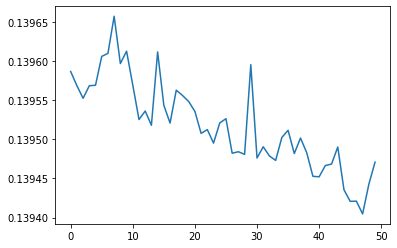

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
model.save("dropout")

INFO:tensorflow:Assets written to: dropout/assets


In [7]:
model = tf.keras.models.load_model("dropout")

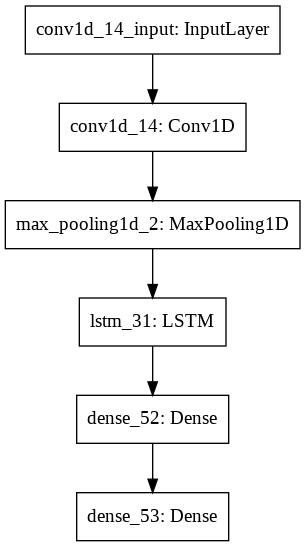

In [ ]:
tf.keras.utils.plot_model(
    model)

In [8]:
# predictions = model.predict(np.reshape(x_test, (x_test.shape[0], -1, 21))[:, :100, :])
# predictions = model.predict(x_test[:, :, :])
model.evaluate(x_test, y_test)

NameError: ignored

In [ ]:
print(np.sum(np.argmax(predictions, axis=1)==y_test)/len(y_test))
print(np.argmax(predictions, axis=1))
print(y_test)

0.9
[8 7 1 1 4 8 2 0 2 8 5 7 9 0 8 0 7 9 4 7 0 7 7 4 2 3 7 0 9 2 9 5 0 0 2 1 8
 1 5 3 8 4 8 1 9 4 0 1 0 2 0 8 4 3 7 5 7 3 3 4 3 7 4 2 8 7 2 9 3 0 7 3 0 5
 3 8 8 4 0 2 5 0 8 1 4 3 0 2 1 9 5 8 0 2 7 9 9 1 0 4 3 0 0 0 8 5 9 9 0 4 2
 5 0 0 2 2 8 5 3 3]
[8 7 1 1 4 8 2 6 2 8 5 7 9 0 8 6 7 9 4 7 0 7 7 4 2 3 7 0 9 2 9 5 6 0 2 1 8
 1 5 3 8 4 8 1 9 4 0 1 0 2 6 8 4 3 2 5 7 3 3 4 3 7 4 2 8 7 2 9 3 0 7 3 0 5
 3 8 8 4 6 2 5 0 8 1 4 3 6 2 1 9 5 8 6 2 7 9 9 1 0 4 3 0 6 6 8 5 9 9 0 4 2
 5 6 6 2 2 8 5 3 3]


In [9]:
run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = 357
INPUT_SIZE = 7
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))

# model directory.
MODEL_DIR = "dropout"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("dropout.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("dropout.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: dropout/assets
Model is 21936 bytes


In [10]:
!apt-get -qq install xxd

Selecting previously unselected package xxd.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.4_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.4) ...
Setting up xxd (2:8.0.1453-1ubuntu1.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [11]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat dropout.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

FileNotFoundError: ignored

In [ ]:
%ls

 beryldata/            fixed_model/                              seven.png
 classifier_v0/        fixed_model.tflite                        six.png
 concatenated0.pkl     four.png                                  three.png
 datacollect.ipynb     hail_sogmoid/                             training.ipynb
 data_collect_v3.ino   hail_sogmoid.tflite                       two.png
 data_read_v3.py      'M119 Winter 2021 Project Proposal.gdoc'   zero.png
 eight.png             nine.png
 five.png              one.png


In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

NameError: ignored